In [143]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Cargamos dataset original

In [144]:
# Cargar datasets
train_reviews = pd.read_csv("../data/train_reviews.csv")
test_reviews = pd.read_csv("../data/test_reviews.csv")
usuarios = pd.read_csv("../data/usuarios.csv")
negocios = pd.read_csv("../data/negocios.csv")

C:\Users\aleja\AppData\Local\Temp\ipykernel_8080\2779904179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios = pd.read_csv("../data/usuarios.csv")


## Carácteristicas train original

In [145]:
train_reviews.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
915194,M2FDQKT-ms3j_m4s-fJRHg,Lliu__uADhgigwZb26_bIg,Xk6GSFf8KGGZ3cyYijwRcw,3.0,0,0,0,"Again, It is more like 3.5 stars rather than 3...",2012-01-24 20:46:42
327889,VV31uelHqwUNnKpNNTOtww,VUUoCDEci-HYFZM9Xel6Ew,rbPK4jSyFS10zhWYvo_Srg,5.0,0,0,0,This is honestly the best meal I have ever ate...,2020-02-02 00:58:52
751739,JojP6E2jq0AGLnHpKo_osw,jRGHwGT_ofQCRYuwHyW21w,9A8AuBfUNyWdQRTRjIlpzA,2.0,0,1,0,Was only here once and bought a myriad of grea...,2016-04-23 19:19:56
23986,Gi1biroln0L705VBLNs2KQ,DGWjCu4C92KFPJGG8AV0gw,R5FZGW_oNkQPZY9cN4HKRw,5.0,0,0,0,Fantastic food! So glad we tried this place. ...,2020-05-20 22:46:59
544855,Zu_LoGP8Pp3Ua5M3lzPX_A,EfJzUT7s7xxsfSEwm03Y5Q,RLlOK2fL6xU1sfIPiP2QBw,3.0,0,0,0,Had dinner here. A bit overpriced for what you...,2016-12-12 00:02:53


In [146]:
train_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [147]:
train_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

## Carácteristicas test original

In [148]:
test_reviews.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date
124040,tWaKvlxAAVN63QNGmBRuFw,LQylqgPdavk_cJ4qTPKAog,fO9yTMeQdBLDGDdxYHJQog,0,0,0,I would give 0 stars if possible. I came in wi...,2021-08-27 20:25:52
176252,1Ui7MvkvAHslG7Znf92KwA,tdNeZTey5mN3O-ojmrUO-g,B6Nyhhfj5RroD7nsXtOFTw,0,0,0,"If you are thinking about going to Amigos, DON...",2019-01-20 13:27:51
210342,TqCgO3Djp7eQZMXS-cYQTQ,bg1DRK34v-6DkT8F-M81IQ,R5Hurw1DgvxqwCh-04WyOg,1,0,0,Had dinner here because Clearwater beach eatin...,2014-07-12 08:12:22
311802,-_ZZLgZQAFd5lVb2OdqxOg,gr8tlXyxsH1sso3GMfvhog,PrcFMhxiUreUubfZchYQmw,0,0,0,"I frequently get massages, for my sore muscles...",2018-08-04 20:47:01
243909,0UmP_cfwxDPib_HSvNCnlQ,LCZSBQCIss8Aw3AXcdFSow,0qu0fNTOsSmuREYVIMPuIQ,11,7,11,"OMG! This was the best meal, and dining exper...",2010-05-28 01:06:26


In [149]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [150]:
test_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date'],
      dtype='object')

# Exploración usuario

In [151]:
usuarios.sample(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
610284,GP2NN3y5-KnjRgHgXURItg,Jose,1,2016-01-24 00:43:06,0,0,0,NaN,NaN,0,5.00,0,0,0,0,0,0,0,0,0,0,0
652447,EBp18DsMWt-EPO_Alx6K7A,Brian,9,2014-12-20 02:03:49,5,0,4,NaN,NaN,0,4.22,0,0,0,0,0,0,0,0,0,0,0
193874,JusK_EsXHqJvQ2Qibg6Ufw,Shannon,8,2014-05-03 01:58:15,1,0,0,NaN,NaN,0,3.13,0,0,0,0,0,0,0,0,0,0,0
150280,IvBwoVaVE5sNChx4riTuBw,Hayley,5,2015-08-21 00:29:13,1,1,1,NaN,"oMquqCPDsiYHKCZX4w3Hqw, UNRmICZbkfK4oQFARC2PMQ...",2,5.00,0,0,0,0,0,0,0,0,0,0,0
453040,ioLsGlx5rhbeHY9sIPqjUw,Khadijah,2,2021-04-23 23:16:20,0,0,0,NaN,NaN,0,3.50,0,0,0,0,0,0,0,0,0,0,0


In [152]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699619 entries, 0 to 699618
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             699619 non-null  object 
 1   name                699607 non-null  object 
 2   review_count        699619 non-null  int64  
 3   yelping_since       699619 non-null  object 
 4   useful              699619 non-null  int64  
 5   funny               699619 non-null  int64  
 6   cool                699619 non-null  int64  
 7   elite               55411 non-null   object 
 8   friends             427407 non-null  object 
 9   fans                699619 non-null  int64  
 10  average_stars       699619 non-null  float64
 11  compliment_hot      699619 non-null  int64  
 12  compliment_more     699619 non-null  int64  
 13  compliment_profile  699619 non-null  int64  
 14  compliment_cute     699619 non-null  int64  
 15  compliment_list     699619 non-nul

In [153]:
for col in usuarios.columns:
    print(usuarios[col].value_counts())

user_id
qVc8ODYU5SZjKXVBgXdI7w    1
iA1B6ah5sCh7jEwj6Ai95w    1
Y8MQz8P697xRyIGaEe4yKg    1
LQBe62Qq3cvLqsGJaEF5Rw    1
TC4aD5qZtE5oc72sSvwfOg    1
                         ..
SUokZE-eIboa2-GrO9rZVg    1
kjrFvGQnQwOWiA5u5XskHA    1
4LLGhrsgy65kcpIuiVEgmg    1
M2zqfnBr2EUI28y8aVRGng    1
wL5jPrLRVCK_Pmo4lM1zpA    1
Name: count, Length: 699619, dtype: int64
name
John       6435
Michael    5849
David      5611
Chris      5289
Mike       4795
           ... 
A Kate        1
Vil           1
Bethani       1
Efa           1
Gwendy        1
Name: count, Length: 61409, dtype: int64
review_count
1       68946
2       59690
3       51296
4       42746
5       35944
        ...  
1597        1
1375        1
1895        1
1017        1
2030        1
Name: count, Length: 1924, dtype: int64
yelping_since
2019-03-05 00:10:27    3
2015-07-08 23:52:22    2
2011-12-30 15:36:34    2
2014-07-03 19:01:30    2
2018-01-02 23:24:32    2
                      ..
2011-03-06 18:49:18    1
2009-06-05 04:34:16    1

In [154]:
usuarios.isnull().sum()

user_id                    0
name                      12
review_count               0
yelping_since              0
useful                     0
funny                      0
cool                       0
elite                 644208
friends               272212
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

## Drop columnas

In [155]:
new_usuarios = usuarios.drop(columns=["elite", "friends", "name"]) # ?
new_usuarios.columns

Index(['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool',
       'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')

## Procesamiento `compliment_`

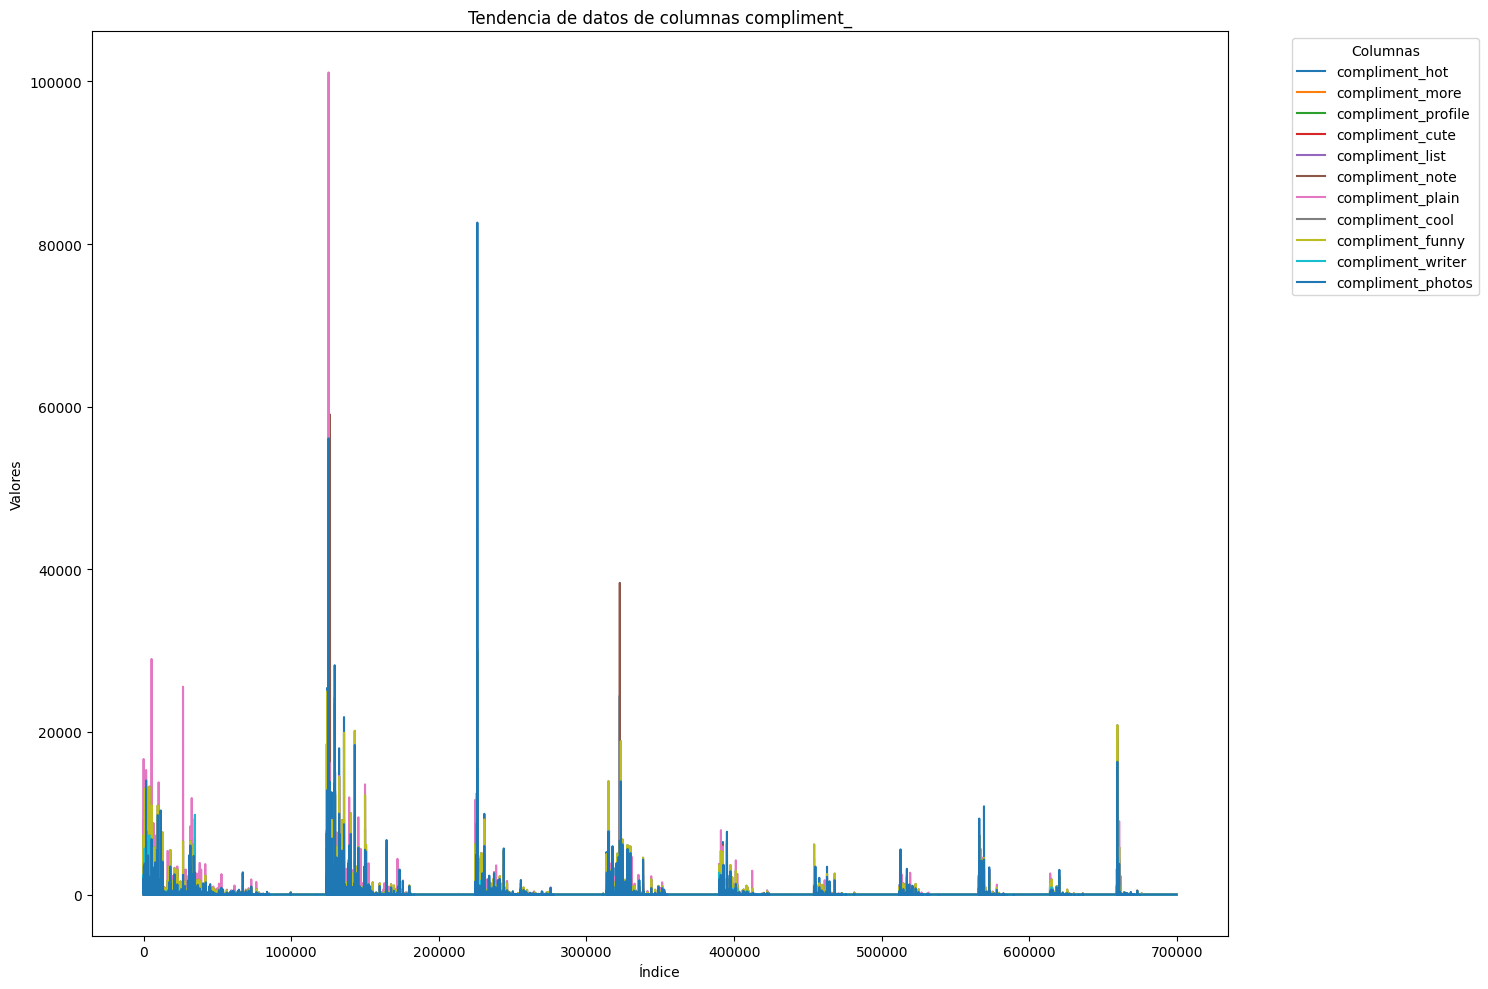

In [156]:
# Filtrar las columnas que comienzan con 'compliment_'
compliment_cols = [col for col in new_usuarios.columns if col.startswith("compliment_")]

# Crear un DataFrame con solo esas columnas
compliment_data = new_usuarios[compliment_cols]

# Crear un gráfico de distribución para cada columna
compliment_data.plot(kind='line', figsize=(15, 10), title='Tendencia de datos de columnas compliment_')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend(title='Columnas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [157]:
# Sumar todas las columnas que empiezan con 'compliment_'
new_usuarios['compliment'] = new_usuarios[compliment_cols].sum(axis=1)

# Eliminar las columnas originales si ya no son necesarias
new_usuarios = new_usuarios.drop(columns=compliment_cols)

# Verificar el resultado
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
422806,H7WLi0y5Pj_aqs9abKTs8A,4,2019-03-25 04:12:53,0,1,0,0,2.80,0
451847,njdkkQtU4YvPan66KPdVDQ,5,2017-05-30 02:59:48,8,0,2,1,2.60,0
318321,id2PorJklxhytP-JAwpu-Q,251,2012-09-25 12:53:16,477,168,141,11,4.16,41
329941,9MTncYvz086VjfZMg5OHbw,3,2016-05-19 23:45:16,1,0,0,0,4.33,0
209848,6bYODXe_tLGRZRvS3qjWDg,4,2016-09-05 00:40:37,1,0,0,0,4.75,0


In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_usuarios["compliment"] = scaler.fit_transform(new_usuarios["compliment"].values.reshape(-1, 1))

new_usuarios["compliment"].describe()

count    6.996190e+05
mean     6.093683e-18
std      1.000001e+00
min     -3.508534e-02
25%     -3.508534e-02
50%     -3.508534e-02
75%     -3.266433e-02
max      3.925654e+02
Name: compliment, dtype: float64

## Procesamiento columnas de enteros

In [159]:
from sklearn.preprocessing import StandardScaler

compliment_cols = ["review_count", "useful", "funny", "cool", "fans"]

scaler = StandardScaler()

new_usuarios[compliment_cols] = scaler.fit_transform(new_usuarios[compliment_cols])

new_usuarios[compliment_cols].describe()

,review_count,useful,funny,cool,fans
count,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05
mean,-1.592482e-17,-5.281192e-19,3.412462e-18,-1.425922e-17,3.412462e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.047548e-01,-7.761433e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
25%,-2.801503e-01,-7.661663e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
50%,-2.309414e-01,-7.262584e-02,-4.996237e-02,-5.212889e-02,-9.224837e-02
75%,-9.151607e-02,-5.566497e-02,-4.517766e-02,-4.759982e-02,-5.714961e-02
max,1.429998e+02,2.057435e+02,2.963183e+02,2.262622e+02,4.385369e+02


## Procesamiento fecha

In [160]:
new_usuarios['yelping_since'] = pd.to_datetime(usuarios['yelping_since'], errors='coerce')

new_usuarios['yelping_since'] = new_usuarios['yelping_since'].dt.year

new_usuarios['yelping_since'].value_counts()

yelping_since
2015    86327
2014    84032
2013    77842
2012    74207
2016    72077
2011    67727
2017    48702
2010    43511
2018    41295
2019    30608
2009    26512
2020    13342
2008    13234
2021    10252
2007     6502
2006     2407
2022      586
2005      424
2004       32
Name: count, dtype: int64

In [161]:
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
357365,za7KdJskViOlK7fhQgG8Cg,-0.140725,2016,-0.075619,-0.051557,-0.053261,-0.092248,3.81,-0.035085
625930,1vgFXgJ2j-h6KfT7Rxu5BQ,1.647199,2014,0.330444,0.139831,0.130166,0.328937,3.48,-0.010875
378157,6vsNvRQbo1MYEgpeQ5ltCw,0.072514,2009,0.031135,0.001075,-0.035145,-0.022051,3.33,-0.030243
477608,T_x4ta3kVuPMpW3esqTYCA,-0.296553,2018,-0.077614,-0.051557,-0.053261,-0.092248,4.00,-0.035085
367521,Fmiqus1hlEv2ZnSOgjoWsA,-0.296553,2016,-0.077614,-0.051557,-0.053261,-0.092248,5.00,-0.035085


## Últimos pasos

In [162]:
new_usuarios = new_usuarios.drop(columns=["yelping_since", "useful", "funny", "cool", "fans"])
new_usuarios.sample(5)

,user_id,review_count,average_stars,compliment
454160,bzhuuxYMunfZEc7-mN8ZbQ,-0.271949,3.75,-0.035085
338665,0Ro0OzmGDUN5Ri4SW73c2Q,-0.247344,4.43,-0.035085
399693,gegG9QwYL6iQtwtg0XQBfw,-0.247344,4.86,-0.035085
140879,ttTbu3z3HO9ZtwfsZVVmUg,-0.255546,4.43,-0.035085
483600,lFATili0ynfgWIBsHclQcg,0.597409,4.29,-0.030243


In [163]:
new_usuarios.isnull().sum()

user_id          0
review_count     0
average_stars    0
compliment       0
dtype: int64

# Exploración negocio

In [164]:
negocios.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
20481,r926yelr_EJAKQCjdD6AWA,State & Fig,"1114 State St, Ste 18",Santa Barbara,CA,93101,34.423044,-119.703208,4.0,519,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, American (New), Delis, Breakfast ...","{'Monday': '0:0-0:0', 'Wednesday': '11:30-14:3..."
28821,VEVHpKauadQw7OmfxQ-QOA,"Stephen G Nelson, MD",5601 Dr Martin Luther King Jr St N,St Petersburg,FL,33703,27.823586,-82.646551,2.5,10,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Doctors, Health & Medical, Pediatricians","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
6920,u54yJbbdXTNnkKBbUHxqyw,Signs 2 U,4828 W Emerald St,Boise,ID,83706,43.612233,-116.241504,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Printing Services, Screen Printing, Local Serv...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '..."
19438,rcvmIeQCrMX8A1lwi4BzVQ,St Vincent Breast Center,"8550 Naab Rd, Ste 300",Indianapolis,IN,46260,39.911210,-86.199455,4.5,6,1,{'ByAppointmentOnly': 'True'},"Obstetricians & Gynecologists, Hospitals, Doct...",NaN
16628,Ans05SQowHauAKOM6cTDeg,Historic Open Air Post Office,400 First Ave N,Saint Petersburg,FL,33731,27.709093,-82.679045,3.5,7,1,NaN,"Landmarks & Historical Buildings, Public Servi...","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'..."


In [165]:
negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   30069 non-null  object 
 1   name          30069 non-null  object 
 2   address       29068 non-null  object 
 3   city          30069 non-null  object 
 4   state         30069 non-null  object 
 5   postal_code   30057 non-null  object 
 6   latitude      30069 non-null  float64
 7   longitude     30069 non-null  float64
 8   stars         30069 non-null  float64
 9   review_count  30069 non-null  int64  
 10  is_open       30069 non-null  int64  
 11  attributes    27300 non-null  object 
 12  categories    30052 non-null  object 
 13  hours         25381 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.2+ MB


In [166]:
for col in negocios.columns:
    print(negocios[col].value_counts())

business_id
GDEEPQdYs2utMN-R4znZSA    1
zi23F23_8ao4Gz1Ecj5ywA    1
ldPcDAa_u66jQINDlutTsQ    1
9SP-J_N2DV_Dodg1VxnXoQ    1
HF9LX5776QYYK70tyIL8gw    1
                         ..
d-2fDzziIxhbDn3tzH9GTg    1
-muLz726oAXME0r6nAm4WA    1
Qp5m70lC2KorILVRdpeR0g    1
ul97zyH40F8OMTwRIgJqDQ    1
5mDnmxXBbVuNagxyyNENoQ    1
Name: count, Length: 30069, dtype: int64
name
McDonald's              158
Starbucks               143
Dunkin'                 102
Walgreens                89
Subway                   87
                       ... 
GA Foods                  1
Fuzzy's Taco Shop         1
Tampa Tattoo              1
Reno Buggie Barn          1
Old Cedar Campground      1
Name: count, Length: 25117, dtype: int64
address
160 N Gulph Rd                    20
51 N 12th St                      16
1 Terminal Dr                     10
2223 N Westshore Blvd             10
6901 22nd Ave N                    8
                                  ..
2815 Lebanon Pike                  1
123 Nutt Rd       

In [167]:
negocios.isnull().sum()

business_id        0
name               0
address         1001
city               0
state              0
postal_code       12
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2769
categories        17
hours           4688
dtype: int64

## Drop columnas

In [168]:
new_negocios = negocios.drop(columns=["hours", "name", "postal_code", "address", "latitude", "longitude"]) # ?
new_negocios.columns

Index(['business_id', 'city', 'state', 'stars', 'review_count', 'is_open',
       'attributes', 'categories'],
      dtype='object')

## Procesamiento `state`

In [169]:
state_counts = new_negocios['state'].value_counts()
state_counts

state
PA    6852
FL    5226
TN    2363
IN    2231
MO    2152
LA    2044
AZ    1952
NJ    1788
NV    1555
AB    1155
CA    1055
ID     881
DE     436
IL     376
WA       1
CO       1
VI       1
Name: count, dtype: int64

<Axes: title={'center': 'Distribución de Estados en new_negocios'}, xlabel='state'>

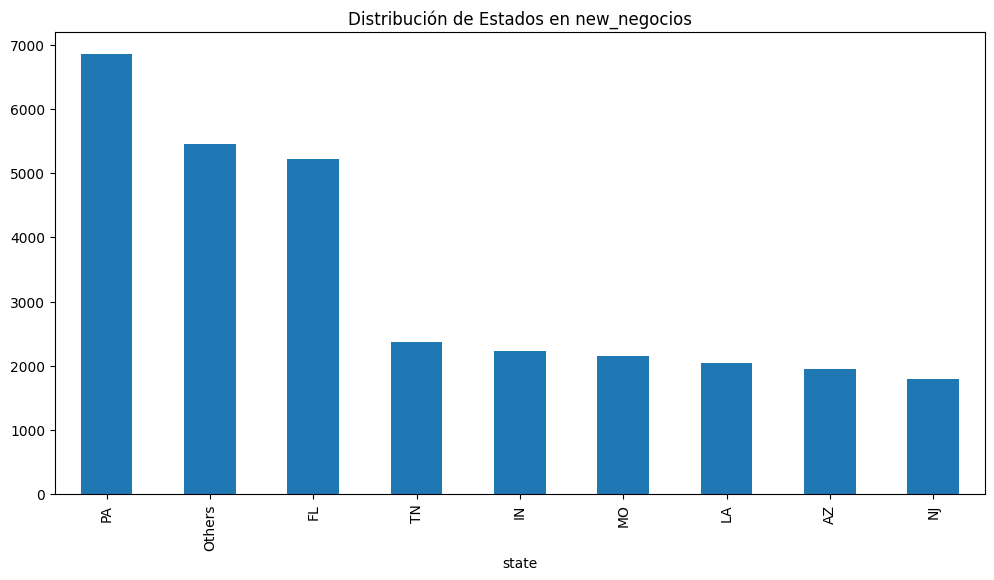

In [170]:
umbral = state_counts.mean()

# Paso 3: crear una nueva columna donde los estados raros se etiquetan como 'Others'
new_negocios['state'] = new_negocios['state'].apply(lambda x: x if state_counts[x] >= umbral else 'Others')
new_negocios['state'].value_counts().plot(kind='bar', figsize=(12, 6), title='Distribución de Estados en new_negocios')

In [171]:
# from sklearn.preprocessing import OneHotEncoder

# # Crear el codificador
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# # Aplicar sobre la columna 'state'
# state_onehot = encoder.fit_transform(new_negocios[['state']])

# # Obtener los nombres de columnas codificadas
# state_columns = encoder.get_feature_names_out(['state'])

# # Crear DataFrame con los vectores
# state_vector_df = pd.DataFrame(state_onehot, columns=state_columns, index=new_negocios.index)

# # (opcional) Unirlo al dataset original
# new_negocios = pd.concat([new_negocios, state_vector_df], axis=1)

In [172]:
new_negocios = new_negocios.drop(columns=["state"])

In [173]:
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories
13305,lTE4kAGdbUYe85yhMyRFKA,La Vergne,1.0,11,1,"{'RestaurantsDelivery': 'True', 'DriveThru': '...","Fast Food, Restaurants, Burgers"
616,Xuppzuq-HxuzmT3fsGwP_g,Philadelphia,2.5,8,0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Shopping, Drugstores"
23645,VEtWK_cwTQSgL03RIvJA8g,Fort Washington,3.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Caters...","Pizza, Restaurants"
9407,ZB01VMnBmMlMem_6OtrQmQ,Southampton,4.0,43,1,"{'GoodForKids': 'False', 'Alcohol': ""u'full_ba...","Bars, Sports Bars, Restaurants, Nightlife, Ame..."
16056,jHTu-cgM6zPg7MzF6VN3KA,Indianapolis,2.5,16,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Car Wash, Auto Detailing, Automotive"


## Procesamiento `review_count`

In [174]:
scaler = StandardScaler()

new_negocios['review_count'] = scaler.fit_transform(new_negocios[['review_count']])
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories
28329,jBdDrG4NC0aQGnnoKDtPGg,Turnersville,4.0,-0.280185,1,NaN,"Burgers, Restaurants, Pizza, Sandwiches"
4841,e4lrDi48799CTlV6CYVufw,Philadelphia,5.0,-0.296027,1,{'BusinessAcceptsCreditCards': 'True'},"Local Services, IT Services & Computer Repair"
1577,NygBUnVYCNxp38SMVyvfsA,Lutz,4.0,-0.248501,0,"{'HasTV': 'True', 'BusinessParking': ""{'garage...","American (Traditional), Caterers, Sports Bars,..."
4318,K5XSaFkH2jyA1FbB0b5Xxg,Broomall,2.0,-0.311869,1,NaN,"Medical Centers, Health & Medical"
16956,Ta3fiQLJdmQy38uQlaCxRw,Moorestown,1.5,-0.232659,1,"{'BusinessParking': ""{'garage': False, 'street...","Medical Supplies, Health & Medical, Shopping"


## Procesamiento `categories`

In [175]:
new_negocios['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                                                       217
Restaurants, Pizza                                                                                                                               181
Nail Salons, Beauty & Spas                                                                                                                       178
Chinese, Restaurants                                                                                                                             157
Restaurants, Mexican                                                                                                                             155
                                                                                                                                                ... 
American (Traditional), American (New), Hot Dogs, Burgers, Restaurants                         

Voy a dejarlo igual y hago encoder luego

In [176]:
# def clasificar_categoria(categorias_str):
#     categorias_str = str(categorias_str).lower()  # Por si hay NaNs o capitalización distinta

#     if any(x in categorias_str for x in ['restaurant', 'pizza', 'mexican', 'chinese', 'japanese', 'sushi', 'ramen']):
#         return 'Restaurant'
#     elif any(x in categorias_str for x in ['fast food', 'burgers', 'hot dogs']):
#         return 'Fast Food'
#     elif any(x in categorias_str for x in ['nail', 'beauty', 'spa', 'hair', 'salon', 'fashion']):
#         return 'Beauty'
#     elif any(x in categorias_str for x in ['shopping', 'wear', 'clothing']):
#         return 'Shopping'
#     elif any(x in categorias_str for x in ['hotel', 'travel', 'campgrounds']):
#         return 'Hospitality'
#     elif any(x in categorias_str for x in ['cleaning', 'services', 'laundry']):
#         return 'Services'
#     else:
#         return 'Others'
    
# new_negocios['categories'] = new_negocios['categories'].apply(clasificar_categoria)
# new_negocios.sample(5)

## Procesamiento `attributes`

In [177]:
new_negocios['attributes'].value_counts()

attributes
{'BusinessAcceptsCreditCards': 'True'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1884
{'ByAppointmentOnly': 'True'}                                                                                                                

Complicado de primeras (la dejo y encoder)

In [178]:
# new_negocios = new_negocios.drop(columns=["attributes"])
# new_negocios.sample(5)

## Procesamiento `city`

In [179]:
new_negocios['city'].value_counts()

city
Philadelphia        2938
Tucson              1817
Tampa               1779
Indianapolis        1500
Nashville           1369
                    ... 
S.Pasadena             1
Lake Saint Louis       1
Marlborough            1
Meridan                1
East Nashville         1
Name: count, Length: 776, dtype: int64

Complicado de primeras

In [180]:
new_negocios = new_negocios.drop(columns=["city"])
new_negocios.sample(5)

,business_id,stars,review_count,is_open,attributes,categories
9814,mSIk7UFW6Z4_HvGagYSJaw,4.0,-0.311869,1,{'BusinessAcceptsCreditCards': 'True'},"Event Planning & Services, DJs, Recording & Re..."
14537,DveLJu6Wo8UCunM7iarKhA,5.0,0.393097,1,"{'NoiseLevel': ""u'quiet'"", 'RestaurantsGoodFor...","Restaurants, Sandwiches, Salad, Italian"
22746,UqMGC18FJ_3VdWKGUVNBBQ,4.0,-0.098003,1,"{'ByAppointmentOnly': 'True', 'RestaurantsPric...","Acupuncture, Skin Care, Pets, Pet Stores, Beau..."
14971,1uwYVvBZzkQRtKRKO8n9OA,3.0,-0.240580,1,{'GoodForKids': 'True'},"Arts & Entertainment, Museums"
17012,hePyMqA7sTKL8iyYoHA4TQ,3.0,-0.058398,1,"{'WiFi': ""u'paid'"", 'BikeParking': 'True', 'No...","Event Planning & Services, Caterers, Mexican, ..."


## Últimos pasos

Dropeo las state porque estudiando la importancia que le da a los modelos no aporta mucho :( 

In [181]:
# new_negocios = new_negocios.drop(columns=[col for col in new_negocios.columns if col.startswith("state_")])
# new_negocios.sample(5)

Rellenos nulls.

In [182]:
new_negocios['attributes'] = new_negocios['attributes'].fillna(" ")
new_negocios['categories'] = new_negocios['categories'].fillna(" ")

In [183]:
new_negocios.isnull().sum()

business_id     0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
dtype: int64

In [184]:
train_reviews.shape, new_usuarios.shape, new_negocios.shape

((967784, 9), (699619, 4), (30069, 6))

# Mergear datos

## Train

In [185]:
# Renombrar columnas de new_negocios, excepto 'business_id'
new_negocios_renamed = new_negocios.rename(
    columns={col: col + "_neg" for col in new_negocios.columns if col != "business_id"}
)

# # Renombrar columnas de new_usuarios, excepto 'user_id'
new_usuarios_renamed = new_usuarios.rename(
    columns={col: col + "_user" for col in new_usuarios.columns if col != "user_id"}
)

# Unir las reseñas con la información de negocios
df_merged = train_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
df_merged = df_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_merged.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
0,ZZO43qKB-s65zplC8RfJqw,-1BSu2dt_rOAqllw9ZDXtA,smkZq4G1AOm4V6p3id5sww,5.0,0,0,0,Fantastic fresh food. The greek salad is amazi...,2016-09-30 15:49:32,4.5,0.773303,1,"{'Caters': 'True', 'NoiseLevel': ""u'average'"",...","Restaurants, Greek",-0.230941,4.08,-0.033875
1,vojXOF_VOgvuKD95gCO8_Q,xpe178ng_gj5X6HgqtOing,96_c_7twb7hYRZ9HHrq01g,1.0,2,0,1,Been a patient at Largo Med/Diagnostic Clinic ...,2020-12-09 14:39:51,2.5,-0.177212,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Doctors, Medical Centers, Health & Medical, We...",-0.050509,2.89,-0.035085
2,KwxdbiseRlIRNzpgvyjY0Q,axbaerf2Fk92OB4b9_peVA,e0AYjKfSF0DL-5C1CpOq6Q,4.0,0,0,0,The location is convenient to my campus so I d...,2013-09-04 16:19:51,2.5,-0.296027,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Eyewear & Opticians, Laser Eye Surgery/Lasik, ...",-0.271949,3.75,-0.033875
3,3mwoBcTy-2gMh0L91uaIeA,_GOiybb0rImYKJfwyxEaGg,vF-uptiQ34pVLHJKzPHUlA,5.0,0,0,0,I agree with all the other compliments posted ...,2019-03-02 12:24:14,4.5,0.226757,0,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Mediterranean, Greek",0.146327,3.79,-0.032664
4,XfWf7XsBWs3kYyYq7Ns1ZQ,ojWKg3B5pH3ncAsxun3kUw,X28XK71RuEXPapeyUOwNzg,5.0,10,4,7,"Wanting to help out the local economy, I thoug...",2020-04-23 18:26:29,4.0,-0.105924,1,"{'Music': ""{'dj': False, 'background_music': F...","Bars, Restaurants, Nightlife, American (Tradit...",1.138707,4.20,0.004861


In [186]:
df_merged.info()
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           967784 non-null  object 
 1   user_id             967784 non-null  object 
 2   business_id         967784 non-null  object 
 3   stars               967784 non-null  float64
 4   useful              967784 non-null  int64  
 5   funny               967784 non-null  int64  
 6   cool                967784 non-null  int64  
 7   text                967784 non-null  object 
 8   date                967784 non-null  object 
 9   stars_neg           967784 non-null  float64
 10  review_count_neg    967784 non-null  float64
 11  is_open_neg         967784 non-null  int64  
 12  attributes_neg      967784 non-null  object 
 13  categories_neg      967784 non-null  object 
 14  review_count_user   967783 non-null  float64
 15  average_stars_user  967783 non-nul

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [187]:
df_merged.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'stars_neg', 'review_count_neg', 'is_open_neg',
       'attributes_neg', 'categories_neg', 'review_count_user',
       'average_stars_user', 'compliment_user'],
      dtype='object')

In [188]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'] = df_merged['date'].dt.year
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
886912,1f50jcbH-_ogJmNwsqYPRw,6bjBcucIojlHLKHWQ6Um0Q,1He0-3kVfTvNUrHKGAGQXQ,2.0,3,0,0,They desperately need to hire people. There's ...,2021,3.5,0.274282,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Pizza, Italian, Restaurants",0.359566,4.25,-0.022980
415275,H8tManT2J_vqhxUbTd_2uQ,zSjnUsydV0gJw-5QLuF3pQ,U_GLsmCsjGsoCoXUMwRF5w,5.0,0,0,0,Great service at a great price. I set an appoi...,2014,4.0,-0.256422,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Cosmetic Dentists, Health & Medical, Dentists,...",-0.271949,4.45,-0.035085
388688,lBcH0Apw_gPkY-W9mWkO8g,v6oL8VrkrTGv-DlG0c1asA,cPDX2Y4H0fks-Qj5tfBduA,5.0,3,1,0,"Ok, I'll admit it...It's true what they say......",2012,4.0,1.082220,1,"{'BusinessParking': ""{'garage': False, 'street...","Desserts, Bakeries, Food, Restaurants",-0.288352,3.00,-0.033875
898533,EWZs1pDobUIvsGl3Ai9UfQ,DfXlNXAU4c5gMDUKDEamcA,ZOBR5vCG0QNJsGnucs2vWw,5.0,0,0,0,This place is phenomenal. Food is exceptional ...,2020,5.0,0.242599,1,"{'HasTV': 'True', 'DogsAllowed': 'False', 'Res...","Event Planning & Services, Caterers, Cafes, Br...",-0.255546,5.00,-0.035085
335427,t7KYdePLDd6HN4jp87D2_A,CFmN0gAX4yBo8rcb2kAMzA,aDSXWJcBh94m9KPZ0X4x4w,5.0,1,0,0,"This is the best sushi for this area. Indy, no...",2017,4.0,1.208956,1,"{'RestaurantsTableService': 'True', 'GoodForKi...","Restaurants, Sushi Bars, Japanese",-0.116121,4.61,-0.027822


### Estandarización

In [189]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_merged[cols] = scaler.fit_transform(df_merged[cols])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
572998,sBLNs5-CzEKKH9l7gBE4Ew,HzEmzPSHcvCBUzf2d8cNRw,ktMvtPI3TBkTOpSf1sTXWw,4.0,-0.391093,-0.150312,-0.251644,"Great food , great location ( for my taste ) ,...",2016,3.0,1.462426,1,"{'WiFi': ""u'no'"", 'Caters': 'False', 'GoodForK...","Restaurants, Tex-Mex, Italian, Food Stands, La...",0.416976,3.42,-0.029033
581373,KhwocLEhZ1ZtqnEsP8u4PA,TJS0QxnxC8HvyQLA6mUJiQ,9OCsSHr6OCSyR91BFIbszQ,3.0,-0.391093,-0.150312,-0.251644,This place is small but the food is packed wit...,2018,3.5,7.545723,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Seafood, Cajun/Creole, Bars, Nightlife, Food, ...",0.228342,3.84,-0.032664
770479,IA0FAGLotod5RMjs0LjKEg,y7L8jgMTI5uM0AoeSOs7Lw,nU6LmqtSI08VMKIibEQRMA,5.0,-0.391093,-0.150312,-0.251644,Had a sausage and pepperoni pizza at Skipolini...,2020,3.5,3.553559,1,"{'OutdoorSeating': 'True', 'Alcohol': ""'full_b...","Pizza, Italian, Restaurants, Burgers, Salad",0.023305,4.30,-0.002402
252699,nLvdL9Ro28JFAoLkwGTG4w,ceEf0gNhhuSnCaUABHzkMQ,QWUhcLhBnWnNVNOHbadwlQ,4.0,-0.391093,-0.150312,0.255613,This is a great place to just hangout w/ the k...,2019,3.5,-0.177212,0,"{'HasTV': 'True', 'RestaurantsTakeOut': 'True'...","Restaurants, Bars, Nightlife, Burgers, Mexican...",-0.157128,4.16,-0.035085
795295,1ihku9jId5aWqcUfYNoY2w,lZmnxdRDDhcVsq16W8qoSQ,b_MIBX3vBfdB2Sz9HqIBfw,1.0,-0.062341,-0.150312,-0.251644,This is a bad place to live in. Besides it loo...,2018,2.0,-0.303948,1,,"Apartments, Home Services, Real Estate",-0.296553,1.00,-0.035085


In [190]:
df_merged.isnull().sum()

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [191]:
df_merged.shape

(967784, 17)

In [192]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           967784 non-null  object 
 1   user_id             967784 non-null  object 
 2   business_id         967784 non-null  object 
 3   stars               967784 non-null  float64
 4   useful              967784 non-null  float64
 5   funny               967784 non-null  float64
 6   cool                967784 non-null  float64
 7   text                967784 non-null  object 
 8   date                967784 non-null  int32  
 9   stars_neg           967784 non-null  float64
 10  review_count_neg    967784 non-null  float64
 11  is_open_neg         967784 non-null  int64  
 12  attributes_neg      967784 non-null  object 
 13  categories_neg      967784 non-null  object 
 14  review_count_user   967783 non-null  float64
 15  average_stars_user  967783 non-nul

### Procesamos date

La borro

In [193]:
df_merged = df_merged.drop(columns=["date"])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
67146,PTzbavlCFFBAgmHC5_tWZA,wge0vP3JQNbiiGrajJtnEA,sD_kcrFx0wSJebh7K21Ohg,5.0,-0.391093,-0.150312,-0.251644,This store is incredible!! No matter who I ne...,4.0,-0.272264,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Women's Clothing, Accessories, Jewelry, Fashio...",-0.296553,5.00,-0.035085
515874,6R6bK51JDmO4L_BJLLgYBg,6dkDAaX-ZX1shNElU9Wazw,1zlxG9PM3Zs_A037rbXLbA,5.0,-0.391093,-0.150312,-0.251644,Thanks for an awesome evening. Do not miss the...,3.5,1.153509,1,"{'HasTV': 'True', 'RestaurantsAttire': ""u'casu...","Local Flavor, Seafood, Restaurants, Steakhouse...",-0.255546,4.00,-0.033875
614619,DgC13-ZFF_VuhX-BlG5Mog,Z0LYgWxpErHScD5OFPFasQ,zJmp_J8SUNosLxk6borpFg,3.0,-0.391093,-0.150312,-0.251644,came here with a vegan friend. the food is not...,4.5,7.514039,1,"{'Alcohol': ""u'full_bar'"", 'GoodForMeal': ""{'d...","American (New), Vegan, Restaurants, Vegetarian",-0.034106,3.63,-0.033875
755226,gwJuRbAJr4XqZslZwJab6w,eDKr4DgDvlji14K3ECkBjg,ww3YJXu5c18aGZXWmm00qg,5.0,-0.391093,-0.150312,-0.251644,"Amazing food, environment, drink and service. ...",4.5,21.478689,1,"{'RestaurantsReservations': 'True', 'NoiseLeve...","Southern, American (New), Breakfast & Brunch, ...",-0.280150,5.00,-0.035085
821780,KZVdCRxAktcTZKsZ_8tfnA,bcEVvUoRXz-W-D21mtnsRg,ARnUDTualdofPP0cpEkIxw,5.0,-0.391093,-0.150312,-0.251644,I went to 2 different orthodontist over the ye...,4.5,-0.113845,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Orthodontists, Dentists, Health & Medical",-0.099718,3.45,-0.033875


### Procesamos nulls del join

In [194]:
df_merged.info()
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           967784 non-null  object 
 1   user_id             967784 non-null  object 
 2   business_id         967784 non-null  object 
 3   stars               967784 non-null  float64
 4   useful              967784 non-null  float64
 5   funny               967784 non-null  float64
 6   cool                967784 non-null  float64
 7   text                967784 non-null  object 
 8   stars_neg           967784 non-null  float64
 9   review_count_neg    967784 non-null  float64
 10  is_open_neg         967784 non-null  int64  
 11  attributes_neg      967784 non-null  object 
 12  categories_neg      967784 non-null  object 
 13  review_count_user   967783 non-null  float64
 14  average_stars_user  967783 non-null  float64
 15  compliment_user     967783 non-nul

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [195]:
columns_to_fill = ["review_count_user", "average_stars_user", "compliment_user"]

for column in columns_to_fill:
    df_merged[column].fillna(df_merged[column].mean(), inplace=True)

C:\Users\aleja\AppData\Local\Temp\ipykernel_8080\4236792472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[column].fillna(df_merged[column].mean(), inplace=True)


In [196]:
df_merged.isnull().sum()

review_id             0
user_id               0
business_id           0
stars                 0
useful                0
funny                 0
cool                  0
text                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [197]:
df_merged.shape

(967784, 16)

In [198]:
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
181228,NHON3ozwp7HIUnVfIecT4A,64Pp0dMH2jnaaZKWyhvODA,c1XNKIP9OW3Uxd7BKLgirQ,4.0,-0.391093,-0.150312,-0.251644,This is probably the best Wingstop I have ever...,3.0,-0.113845,1,"{'OutdoorSeating': 'False', 'BikeParking': 'Tr...","American (New), Restaurants, Chicken Wings",-0.271949,3.50,-0.035085
211861,MpRM0CVV9OIe5tJuwLvAgw,UrQw8IyTOAAlokN-SMK3_Q,YJUJqez_Sg0hFDEXHYls0Q,5.0,11.115202,6.615965,15.980566,Popped in curious about the gelato flavors and...,4.5,-0.200975,1,"{'Caters': 'True', 'BusinessAcceptsCreditCards...","Food, Gelato, Coffee & Tea",15.245266,4.47,2.780548
233894,KAl3Wf9tdSc4ozDS6vLIBw,XmIyqvl9487pGH7gvrkjgg,1E3PYHrVVqR6D_bYt49Lhg,3.0,0.923912,-0.150312,0.255613,So I thought I would give it a go a few times ...,4.0,4.321892,1,"{'RestaurantsReservations': 'True', 'Restauran...","Waffles, Bars, Wine Bars, American (Traditiona...",2.040871,4.57,0.308698
542334,aGVTrKF2vyt5ZxwgRLJYEg,g23ack7_zNsXaC_vxQHXYQ,RgAUDZXDJYwz7BI6u9aP5w,4.0,-0.062341,-0.150312,-0.251644,Really glad I made a reservation because the p...,4.5,2.595123,0,"{'HasTV': 'False', 'BusinessAcceptsCreditCards...","American (New), Restaurants",1.417558,3.91,0.087176
897641,yJ1O4mLl6FNYWPvwigkBYw,sz35thi5opiYDut29WlljQ,D1_RinQIgxGoqbNdq7KRRA,3.0,-0.062341,-0.150312,-0.251644,Retail seafood establishment all looked and sm...,3.5,-0.264343,1,"{'RestaurantsReservations': 'False', 'Business...","Restaurants, Seafood, Food, Specialty Food, Se...",-0.116121,3.87,-0.032664


### Borramos ids, no aportan al modelo

In [199]:
df_merged = df_merged.drop(columns=["user_id", "business_id", "review_id"])

## Test

In [200]:
# Unir las reseñas con la información de negocios
df_test_merged = test_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
df_test_merged = df_test_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_test_merged.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
0,ieYPmCImINjPzTDFmEKBKA,79F9QrQSet-b1yRCIM243Q,sXSUzImYOcRRI3xtG2M85g,1,0,1,Amazing coffee and chill atmosphere. The staff...,2018-01-29 04:33:28,4.5,1.375296,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Breakfast & Brunch, Restaurants, Food, Coffee ...",-0.001300,4.11,-0.032664
1,QIkJ8fZ4yx_QaHahWWszAA,chuM6TBkFHtTwJ6z96Hj1A,Ipt9ga67vVC_2ob3YmVwNA,4,0,2,I pass by this joint every time I make a run t...,2011-01-10 03:10:49,4.0,0.583200,1,"{'GoodForKids': 'True', 'WiFi': ""u'free'"", 'Am...","Breakfast & Brunch, Greek, American (Tradition...",0.679424,3.77,0.152543
2,seR2KhblYMWg-k9zzN6aYA,hF68a0mpu97u0oaryFYhyg,_RG4IByyBR528CMc7DefJA,2,0,0,Came here when my kitten got very sick by the ...,2015-09-06 15:29:02,3.5,0.765382,1,,"Pets, Veterinarians",-0.107919,2.92,-0.031454
3,BToo00Fi5pfJFA5MI2HM5g,G4yX5Q1tFfwSucFOmiyjdA,xxlbRiWWQkk-6LST3Hd12g,2,0,0,So I'll preface by saying we did have an overa...,2015-09-14 00:49:17,4.0,1.256481,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Hot Dogs, American (New), Barbeque, Burgers, C...",0.269349,3.82,0.026650
4,FHJAzi1imodBit3RWK7zQA,Srqi1xb7exdB9uRHxDeEkw,LgGqdFLD7-ca0Z9F_q4Fuw,0,0,0,This place is a joke. Worst bar service ever. ...,2015-07-24 01:03:40,2.5,3.561480,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Resorts, Hotels, Hotels & Travel, Event Planni...",-0.271949,1.25,-0.033875


### Estandarización

In [201]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_test_merged[cols] = scaler.fit_transform(df_test_merged[cols])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
43516,dH7zgeypO5pLRS2q4H82wA,2q462KRDaGqq4IIVvvJLRA,wMG7vnGBKo-xWkV8FSMecA,-0.063127,-0.164229,-0.252063,Took my car in for an oil change and brake ins...,2018-08-16 02:31:34,3.0,0.686172,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Tires, Oil Change Stations, Autom...",-0.189934,3.11,-0.032664
408715,4Kph1s5xHXKKfR7Nn7t3qg,uidi9ofVlT0XJjCqVjjnpw,9FNcJveP8ZEA42HtM_Kd7g,-0.390020,-0.164229,-0.252063,"Love their pizza! Fair prices. However, at thi...",2021-03-14 23:37:34,3.5,-0.280185,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza",-0.271949,4.50,-0.035085
24891,2h437CLpjRLhtfLqRjS6eA,2iLkAYWxNkTaiIvgt7fx-g,o62Bm9NyZ20u8EHuhRPB4g,-0.390020,-0.164229,-0.252063,I haven't done a review in a really long time ...,2019-09-26 21:42:40,4.5,1.208956,1,"{'HasTV': 'True', 'BusinessAcceptsCreditCards'...","Thai, Restaurants",1.532379,3.56,0.000019
227958,SIosF75Ncyr3yPv4F2rcdQ,tiGVfEC7C4Blv7FoPyBnYg,6TUOsIU1vNNQcoauKrZFCw,-0.390020,-0.164229,-0.252063,Delicious! We had a party of 15 at 9am on a Sa...,2015-06-04 03:11:11,4.0,6.991255,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...","American (New), Barbeque, Diners, Southern, Re...",-0.165329,3.94,-0.033875
71589,ryhLcNplU4x27Z04zhJMKw,yzCf218ffeFOKO-nYobSkg,ZDV6ocQSe6dkMt-u011xcQ,-0.063127,-0.164229,-0.252063,"Delicious!!! Had brunch here, but also would h...",2015-02-22 16:09:52,4.0,6.745706,0,"{'BusinessParking': ""{'garage': False, 'street...","Cajun/Creole, Breakfast & Brunch, Soul Food, R...",-0.173531,5.00,-0.032664


### Procesamos date

In [202]:
df_test_merged = df_test_merged.drop(columns=["date"])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
244177,FM2sPQRly7J5El1yobAaoA,-BJpMYvyXg3grKr68jDf-g,pym7c6ZFEtmoH16xN2ApBg,-0.390020,-0.164229,-0.252063,Awesome food. Reasonable prices. Fast delivery...,4.5,9.858643,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Bars, Nightlife, American (Tradit...",-0.280150,3.67,-0.035085
250362,yed8RRyZslMf0eBYkG-kzQ,2CmGWHY7EHCTgTnHxiTRzg,uYMVRPYEqpmVXWN2xOs5KQ,-0.063127,-0.164229,-0.252063,On 5/13 bathrooms were out of order? I should...,4.0,8.789313,1,"{'Alcohol': ""u'full_bar'"", 'NoiseLevel': ""u'av...","Event Planning & Services, American (Tradition...",0.359566,4.33,-0.024191
148311,wClf48F9uRgT2xkovZv_5Q,CBDssDUq2kDPPKVJN6XsAw,mkeS_tVSmb4OKpQQ-O5Thw,-0.390020,-0.164229,-0.252063,Awesome experience. Khelsea was great. She gav...,4.5,2.919883,1,"{'ByAppointmentOnly': 'False', 'GoodForKids': ...","Hair Stylists, Blow Dry/Out Services, Hair Ext...",-0.288352,3.00,-0.035085
187080,olieIDtxiUrX-uEMv5PK8g,uUIfbWNs74fWHXwnI7I5Iw,ZmrebvKKDIOKNCQaNo_8xg,-0.390020,-0.164229,-0.252063,Ordered take-out and just finished our meal. ...,3.5,0.195073,1,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Chicken Shop, Restaurants, Greek, Mediterranean",-0.263747,2.20,-0.035085
168351,g3PjATlZOkc6zJEMg5iYVQ,GwqNQorEd5Li1empkHsyBg,y07g2HgY4poZV0AqjJTzNQ,1.244444,-0.164229,0.759641,"I have a big problem. Actually, my mother does...",3.0,-0.208896,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Restaurants, Seafood",-0.157128,2.12,-0.035085


### Procesamos nulls del join

In [203]:
df_test_merged.isnull().sum()

review_id             0
user_id               0
business_id           0
useful                0
funny                 0
cool                  0
text                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [204]:
df_test_merged.info()
df_test_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review_id           414765 non-null  object 
 1   user_id             414765 non-null  object 
 2   business_id         414765 non-null  object 
 3   useful              414765 non-null  float64
 4   funny               414765 non-null  float64
 5   cool                414765 non-null  float64
 6   text                414765 non-null  object 
 7   stars_neg           414765 non-null  float64
 8   review_count_neg    414765 non-null  float64
 9   is_open_neg         414765 non-null  int64  
 10  attributes_neg      414765 non-null  object 
 11  categories_neg      414765 non-null  object 
 12  review_count_user   414764 non-null  float64
 13  average_stars_user  414764 non-null  float64
 14  compliment_user     414764 non-null  float64
dtypes: float64(8), int64(1), object(6)

review_id             0
user_id               0
business_id           0
useful                0
funny                 0
cool                  0
text                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [205]:
columns_to_fill = ["review_count_user", "average_stars_user", "compliment_user"]

for column in columns_to_fill:
    df_test_merged[column].fillna(df_test_merged[column].mean(), inplace=True)

C:\Users\aleja\AppData\Local\Temp\ipykernel_8080\3648126179.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_merged[column].fillna(df_test_merged[column].mean(), inplace=True)


In [206]:
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
44565,qWz8l4ApT8OBbs8R32p2rg,7TJarbmD2UfHP2GBDRSN2g,Fe9WDVsrEM9H0X_aFDuYVA,-0.063127,0.323761,-0.252063,My server was 10/10.\nAmbiance 15/10.\nI defin...,3.5,0.987169,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Diners, Nightlife, French, Restaurants, Cockta...",0.810648,4.21,0.131964
366651,DKkfX-SlbMPNVfQRE0v8oA,IhArpMooAXau4IDlCIhcPA,3Ym00dQ_oqZ0zunGMLhX3Q,-0.390020,-0.164229,-0.252063,Excellent dinner and service. Started with th...,4.0,6.413025,1,"{'BusinessParking': ""{'garage': True, 'street'...","Restaurants, American (New), Bars, Nightlife",-0.288352,4.50,-0.035085
81943,B-r_cWdIZs1ZwrBDKgG8DQ,djxnI8Ux8ZYQJhiOQkrRhA,fmltN_xSMyqlKGM7tlV4qg,-0.063127,0.323761,0.253789,Walked up to Off Broadway last night for a Chr...,4.0,0.202994,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Bars, Nightlife, Dance Clubs, Arts & Entertain...",20.248174,4.15,28.641762
176841,hfNEZM-NRMfonsJJE1wB4w,WVDuXFO1HCXTWQAOfdeA4g,BjeHLwKOlHyV6DJgmZxAjA,-0.390020,-0.164229,-0.252063,I was looking for a good egg Benedict place an...,4.0,16.575616,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Cafes, American (New),...",-0.230941,5.00,-0.035085
155830,ySTMBJ1gS0ZT5z13Lid36A,QP1Tz8J4Ixu9NcpfjiMxAQ,VKUOnKiqmRl6SrAm0UmTTQ,0.590659,1.299742,0.253789,I would advise against using this business. Th...,3.5,-0.311869,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Auto Repair, Tires, Wheel & Rim Repair, Automo...",-0.222740,3.70,-0.027822


### Ultimos pasos

In [207]:
df_test_merged = df_test_merged.drop(columns=["user_id", "business_id"])
df_test_merged.sample(5)

,review_id,useful,funny,cool,text,stars_neg,review_count_neg,is_open_neg,attributes_neg,categories_neg,review_count_user,average_stars_user,compliment_user
351891,xi8zF3kN74juASZHC2J4NQ,-0.063127,-0.164229,-0.252063,Great experience this morning. The food is del...,5.0,5.232803,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Mexican, Gluten-Free, Vegetarian, Restaurants,...",-0.165329,4.00,-0.035085
73832,-08iPuO7SkRPzzfeCSanXw,-0.390020,-0.164229,-0.252063,Great little breakfast spot in downtown Nashvi...,4.0,6.991255,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...","American (New), Barbeque, Diners, Southern, Re...",-0.263747,2.67,-0.035085
250240,nLn__VeEKzqr2fU-jb_GUg,0.263766,-0.164229,-0.252063,"Great Service, Friendly staff. everything was ...",3.5,0.218836,0,"{'RestaurantsAttire': ""'casual'"", 'Caters': 'T...","Chinese, Restaurants, Sushi Bars",0.146327,4.31,-0.007244
165337,fOjWvqVIM-uvd3LW9A-O-w,0.263766,-0.164229,-0.252063,"I'm a regular at the Rendon Inn, and I have no...",4.0,0.052496,1,"{'HasTV': 'True', 'BusinessAcceptsCreditCards'...","Nightlife, Restaurants, Event Planning & Servi...",0.047909,4.45,-0.029033
300665,qT0NMPr6GujUG4zMPERhrw,-0.063127,-0.164229,-0.252063,Amazing drinks and good service... BUT... ther...,4.5,1.549557,1,"{'RestaurantsDelivery': 'False', 'BusinessPark...","Coffee Roasteries, Acai Bowls, Food, Coffee & ...",-0.099718,3.81,-0.035085


In [208]:
df_test_merged.shape, df_merged.shape

((414765, 13), (967784, 13))

In [209]:
df_merged.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'attributes_neg', 'categories_neg',
       'review_count_user', 'average_stars_user', 'compliment_user'],
      dtype='object')

In [210]:
df_test_merged.columns

Index(['review_id', 'useful', 'funny', 'cool', 'text', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'attributes_neg', 'categories_neg',
       'review_count_user', 'average_stars_user', 'compliment_user'],
      dtype='object')

In [211]:
df_merged.isnull().sum()

stars                 0
useful                0
funny                 0
cool                  0
text                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [212]:
df_test_merged.isnull().sum()

review_id             0
useful                0
funny                 0
cool                  0
text                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
attributes_neg        0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [213]:
df_test_merged.to_csv("../data/test_reviews_merged_all_more.csv", index=False)
df_merged.to_csv("../data/train_reviews_merged_all_more.csv", index=False)